**Project title** - Heart Failure Prediction using ANN \\
**Name & ID** :Edhi Hasan(1903610201775), Muhammad Hussain(1903610201776) \\
**Section** - C1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Dataset/heart.csv')

In [ ]:
dataset

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
dummy_dataset =  pd.get_dummies(dataset)
dummy_dataset

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
914,68,144,193,1,141,3.4,1,0,1,1,...,0,0,0,1,0,1,0,0,1,0
915,57,130,131,0,115,1.2,1,0,1,1,...,0,0,0,1,0,0,1,0,1,0
916,57,130,236,0,174,0.0,1,1,0,0,...,0,0,1,0,0,1,0,0,1,0


In [ ]:
new_dummy_ds = pd.get_dummies(dataset , drop_first =True )
new_dummy_ds

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,1,0,0,1,1,0,0,1,0
914,68,144,193,1,141,3.4,1,1,0,0,0,1,0,0,1,0
915,57,130,131,0,115,1.2,1,1,0,0,0,1,0,1,1,0
916,57,130,236,0,174,0.0,1,0,1,0,0,0,0,0,1,0


In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
oh_enc = OneHotEncoder(sparse = False)

In [ ]:
oh_enc_arr = oh_enc.fit_transform(dataset[['Sex' , 'ChestPainType' ,'RestingECG' , 'ExerciseAngina' ,'ST_Slope' ]])
oh_enc_arr

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 1., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 1., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 1.]])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X = sc.fit_transform(new_dummy_ds)

In [ ]:
oh_enc_dataset = pd.DataFrame(X , columns=['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
        'Sex_F', 'ChestPainType_ASY',
       'ChestPainType_ATA', 'ChestPainType_NAP',
       'RestingECG_LVH', 'RestingECG_Normal', 
       'ExerciseAngina_N', 'ST_Slope_Down',
       'ST_Slope_Flat', 'ST_Slope_Up'])

In [ ]:
oh_enc_dataset

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,RestingECG_LVH,RestingECG_Normal,ExerciseAngina_N,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,0.244898,0.70,0.479270,0.0,0.788732,0.295455,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.428571,0.80,0.298507,0.0,0.676056,0.409091,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.183673,0.65,0.469320,0.0,0.267606,0.295455,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.408163,0.69,0.354892,0.0,0.338028,0.465909,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,0.530612,0.75,0.323383,0.0,0.436620,0.295455,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,0.346939,0.55,0.437811,0.0,0.507042,0.431818,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
914,0.816327,0.72,0.320066,1.0,0.570423,0.681818,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
915,0.591837,0.65,0.217247,0.0,0.387324,0.431818,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
916,0.591837,0.65,0.391376,0.0,0.802817,0.295455,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
X = oh_enc_dataset.iloc[ :,:-1].values
y = oh_enc_dataset.iloc[ :, -1].values

In [ ]:
X

array([[0.24489796, 0.7       , 0.47927032, ..., 0.        , 0.        ,
        0.        ],
       [0.42857143, 0.8       , 0.29850746, ..., 0.        , 0.        ,
        1.        ],
       [0.18367347, 0.65      , 0.46932007, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.59183673, 0.65      , 0.2172471 , ..., 0.        , 1.        ,
        1.        ],
       [0.59183673, 0.65      , 0.39137645, ..., 0.        , 0.        ,
        1.        ],
       [0.20408163, 0.69      , 0.29021559, ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
y

array([1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0.,
       1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0.,
       0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1.,
       0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1.,
       0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1.,
       0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0.,
       0., 1., 1., 1., 0.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.1 , random_state = 1)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(826, 15)
(92, 15)
(826,)
(92,)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=15, activation='relu'))
model.add(Dense(6, activation='relu'))

model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                192       
                                                                 
 dense_1 (Dense)             (None, 6)                 78        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 277
Trainable params: 277
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train,y_train,epochs=100, batch_size=826 )

Epoch 1/100
1/1 [==============================] - 1s 747ms/step - loss: 0.7223 - accuracy: 0.4237
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 0.7202 - accuracy: 0.4262
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 0.7180 - accuracy: 0.4322
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 0.7159 - accuracy: 0.4358
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 0.7138 - accuracy: 0.4407
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 0.7117 - accuracy: 0.4467
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 0.7096 - accuracy: 0.4479
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 0.7075 - accuracy: 0.4516
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 0.7055 - accuracy: 0.4540
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 0.7035 - accuracy: 0.4564
Epoch 11/100
1/1 [========

In [ ]:
acc = history.history['accuracy']
loss = history.history['loss']

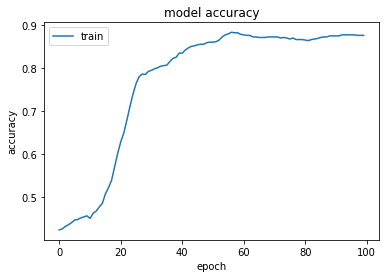

<Figure size 432x288 with 0 Axes>

In [ ]:
from matplotlib import pyplot as plt
#plot training and validation accuracy
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
plt.savefig('accuracy_curve.png')


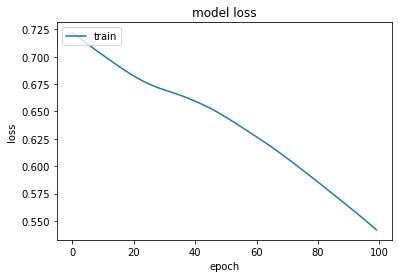

<Figure size 432x288 with 0 Axes>

In [ ]:
#plot training loss
plt.plot(history.history['loss'])
plt.plot()
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
plt.savefig('loss_curve.png')

In [ ]:
history_test = model.evaluate(X_test,y_test)

3/3 [==============================] - 0s 4ms/step - loss: 0.5284 - accuracy: 0.8478


In [ ]:
p_pred = model.predict(X_test)
p_pred = p_pred.flatten()
print(p_pred.round(2))

3/3 [==============================] - 0s 3ms/step
[0.63 0.55 0.42 0.44 0.47 0.83 0.45 0.75 0.74 0.48 0.77 0.45 0.46 0.43
 0.5  0.78 0.43 0.78 0.44 0.46 0.46 0.73 0.58 0.73 0.44 0.5  0.67 0.45
 0.46 0.76 0.66 0.67 0.75 0.74 0.45 0.44 0.42 0.41 0.72 0.66 0.44 0.63
 0.42 0.65 0.73 0.64 0.43 0.72 0.66 0.63 0.84 0.53 0.41 0.56 0.61 0.64
 0.44 0.61 0.44 0.55 0.43 0.45 0.6  0.49 0.69 0.52 0.42 0.43 0.73 0.43
 0.57 0.85 0.44 0.54 0.73 0.45 0.78 0.47 0.42 0.44 0.43 0.42 0.42 0.42
 0.46 0.59 0.84 0.72 0.67 0.87 0.42 0.42]


In [ ]:
y_pred = np.where(p_pred > 0.5, 1, 0)
print(y_pred)

[1 1 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0 1 1 1 1 1 0 0 0
 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 0 0 1 0 1 1 0 1
 1 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0]


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred))

[[42 11]
 [ 3 36]]


In [ ]:

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.93      0.79      0.86        53
         1.0       0.77      0.92      0.84        39

    accuracy                           0.85        92
   macro avg       0.85      0.86      0.85        92
weighted avg       0.86      0.85      0.85        92



Using Linear Regression

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error, r2_score
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE:", mse)
print("R-squared:", r2)

MSE: 0.06159961240760355
R-squared: 0.7477604647228077


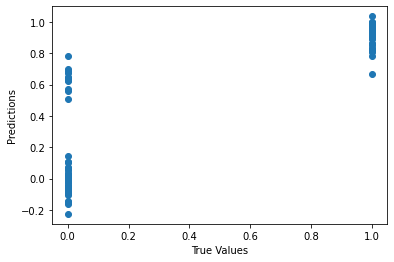

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

Using Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print('Accuracy: %.2f'
      % accuracy_score(y_test, y_pred))
print('Precision: %.2f'
      % precision_score(y_test, y_pred))
print('Recall: %.2f'
      % recall_score(y_test, y_pred))

Accuracy: 0.92
Precision: 0.86
Recall: 0.97


In [ ]:
Using KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9021739130434783
